##TASK 2
##DEEP LEARNING PROJECT


IMAGE CALLSIFICATION USING TENSOR FLOW






In [ ]:
#First install the Tensor Flow
!pip install tensorflow

In [ ]:
# import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST  Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
#Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8764 - loss: 0.4347 - val_accuracy: 0.9598 - val_loss: 0.1370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.1173 - val_accuracy: 0.9696 - val_loss: 0.0995
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9756 - loss: 0.0783 - val_accuracy: 0.9705 - val_loss: 0.0938
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9832 - loss: 0.0567 - val_accuracy: 0.9756 - val_loss: 0.0789
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9868 - loss: 0.0434 - val_accuracy: 0.9771 - val_loss: 0.0728


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0868
Test accuracy: 0.98


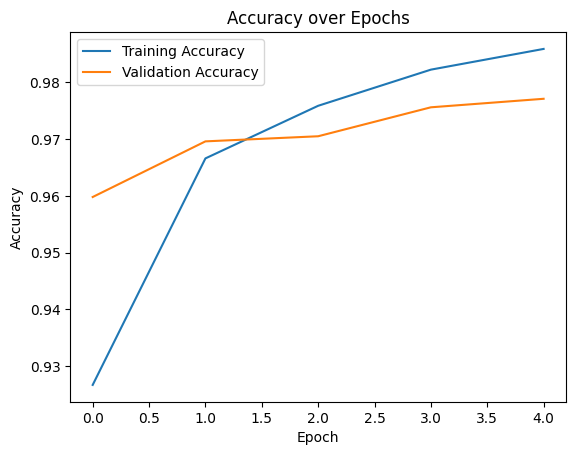

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


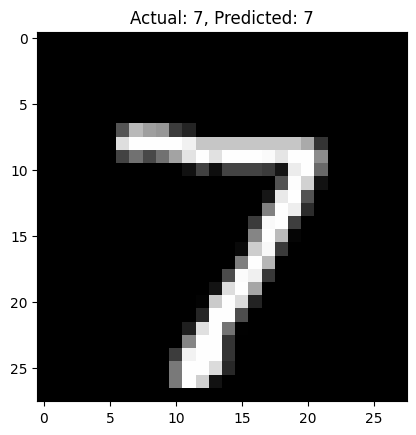

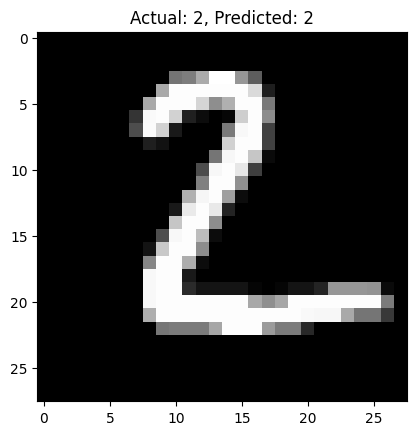

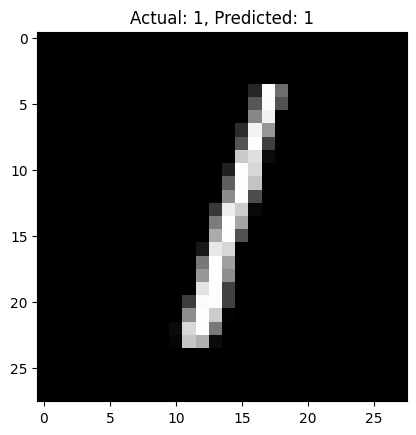

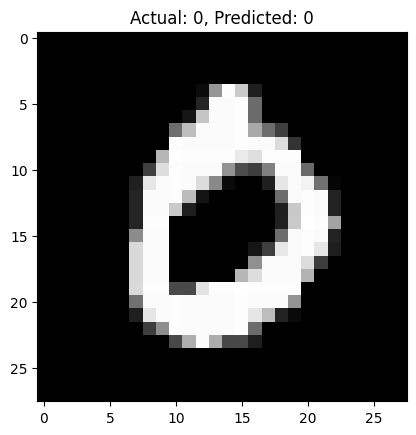

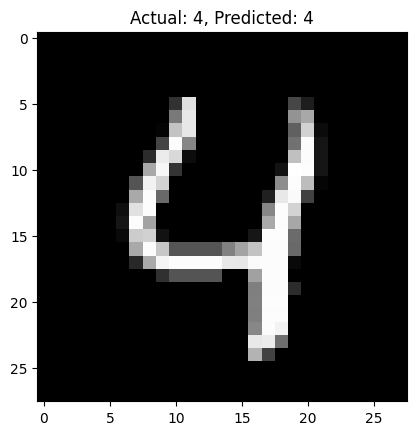

In [ ]:
# Visualize some predictions
import numpy as np

predictions = model.predict(x_test)

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.show()